<a href="https://colab.research.google.com/github/sharma3263/parulsharma_futureintern/blob/main/CIFAR_10_dataset_cnn_based_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Importing the necessary libraries.
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
# Step 2: Loading and pre-processing of the CIFAR-10 dataset.
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [ ]:
# Step 3: Normalising pixel values to be between 0 and 1.
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
# Step 4: Defining the class names for CIFAR-10 images.
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

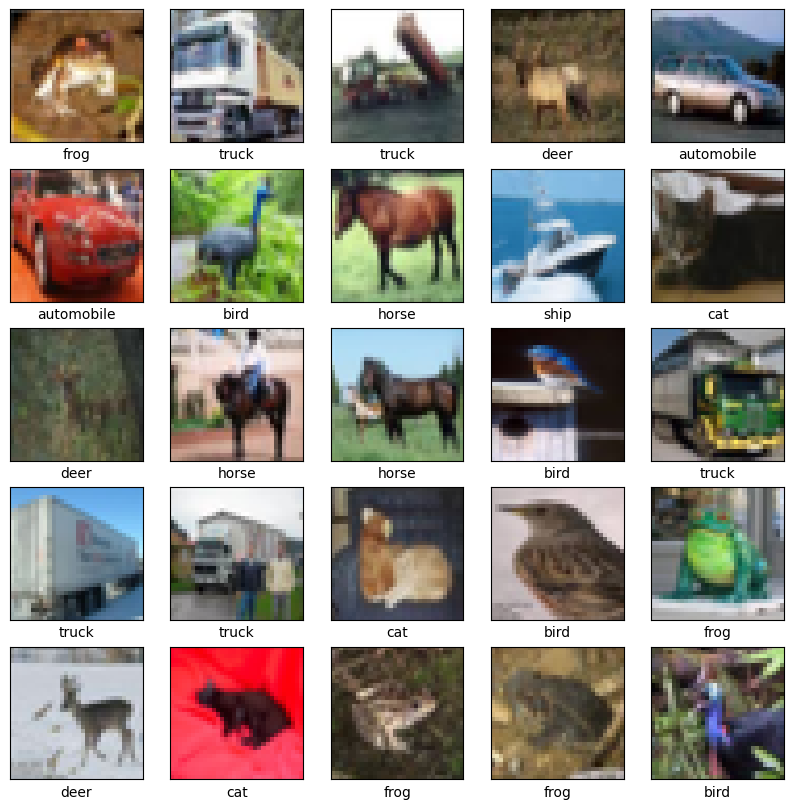

In [ ]:
# Step 5: Visulaising a few training images from the CIFAR-10 dataset.
plt.figure(figsize=(10,10))
for i in range(25):
 plt.subplot(5,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(train_images[i], cmap = plt.cm.binary)
 plt.xlabel(class_name[train_labels[i][0]])
plt.show()

In [ ]:
# Step 6: Building the CNN model (customised model).
model = models.Sequential([
layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64, (3,3), activation='relu'),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64, (3,3), activation='relu'),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(10)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 7: Printing the model summary.
model.summary()
# Step 8: Compiling the CNN model.
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy']
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 9: Training the CNN model.
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.3490 - loss: 1.7539 - val_accuracy: 0.5432 - val_loss: 1.2615
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5676 - loss: 1.2166 - val_accuracy: 0.6168 - val_loss: 1.0842
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6283 - loss: 1.0499 - val_accuracy: 0.6245 - val_loss: 1.0674
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6671 - loss: 0.9465 - val_accuracy: 0.6529 - val_loss: 1.0009
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6964 - loss: 0.8652 - val_accuracy: 0.6717 - val_loss: 0.9612
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7194 - loss: 0.8078 - val_accuracy: 0.6867 - val_loss: 0.8885
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7382 - loss: 0.7544 - val_accuracy: 0.7022 - val_loss: 0.8692
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7513 - loss: 0.7158 -

In [ ]:
# Step 10: Evaluating the performance of the CNN model.
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\n Test accuracy is: {test_acc}')

313/313 - 1s - 2ms/step - accuracy: 0.7002 - loss: 0.8888

 Test accuracy is: 0.7002000212669373


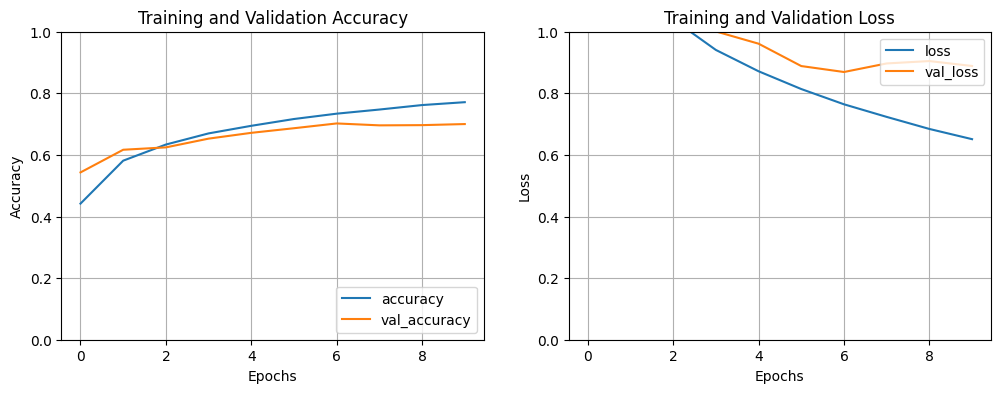

In [ ]:
# Step 11: Plotting the training and validation accuracy and loss values.
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0,1])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()
plt.show()

Image Classifi cation Using CNN with the CIFAR-10 Dataset using basic Hyperparameter Tunning

In [ ]:
pip install keras_tuner

In [ ]:
# Step 1: Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras_tuner.tuners import RandomSearch
import matplotlib.pyplot as plt
# Step 2: Loading and preprocessing the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
# Step 3: Defining the class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
def build_model(hp):
    model = models.Sequential()
    model.add(layers.Conv2D(hp.Int('conv1_units', min_value=32, max_value=128, step=16), (3,3), activation='relu', input_shape=(32,32,3)))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(hp.Int('conv2_units', min_value=32, max_value=128, step=16), (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(hp.Int('conv3_units', min_value=32, max_value=128, step=16), (3,3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(hp.Int('dense_units', min_value=32, max_value=128, step=16), activation='relu'))
    model.add(layers.Dropout(hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(layers.Dense(10))

    # Choose an optimizer and learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))
    model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

    return model

In [ ]:
# Step 5: Define the Tuner
tuner = RandomSearch(
  build_model,
  objective='val_accuracy',
  max_trials=10,
  executions_per_trial=1,
  directory='my_dir',
  project_name='cifar10_tunning'
)

Reloading Tuner from my_dir/cifar10_tunning/tuner0.json


In [ ]:
# Step 6: Perform the Hyperparameter search
tuner.search(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Trial 10 Complete [00h 01m 00s]
val_accuracy: 0.10000000149011612

Best val_accuracy So Far: 0.7028999924659729
Total elapsed time: 00h 11m 51s


In [ ]:
# Step 7: Get the best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
# Step 8: Build the model with the best Hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3392 - loss: 1.7898 - val_accuracy: 0.5118 - val_loss: 1.3732
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5423 - loss: 1.2925 - val_accuracy: 0.5529 - val_loss: 1.2727
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5901 - loss: 1.1583 - val_accuracy: 0.5964 - val_loss: 1.1266
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6217 - loss: 1.0717 - val_accuracy: 0.6226 - val_loss: 1.0615
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6448 - loss: 0.9965 - val_accuracy: 0.6356 - val_loss: 1.0304
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6663 - loss: 0.9511 - val_accuracy: 0.6491 - val_loss: 0.9992
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6808 - loss: 0.9083 - val_accuracy: 0.6487 - val_loss: 1.0136
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6932 - loss: 0.8724 - 

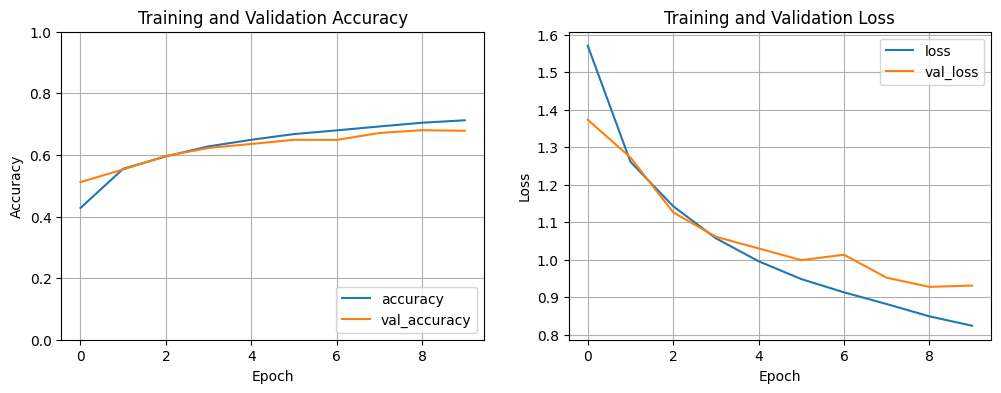

In [ ]:
# Step 9: Plotting training & validation accuracy and loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()
plt.show()

In [ ]:
pip install keras_tuner

In [ ]:

# Step 1: Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras_tuner.tuners import RandomSearch
import matplotlib.pyplot as plt
# Step 2: Loading and preprocessing the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
# Step 3: Defining the class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# Step 4: Define a function to build the model.
def build_model(hp):
 model = models.Sequential()
# Tune the number of Convolutional Layers (1, 2 or 3)
 for i in range(hp.Int('conv_layers', 1, 3)):
  if i == 0:
   model.add(layers.Conv2D(
    filters = hp.Int('filters_' + str(i), min_value=32, max_value=128, step=16),
    kernel_size = (3, 3),
    activation = 'relu',
    input_shape = (32, 32, 3)
))
  else:
   model.add(layers.Conv2D(
    filters = hp.Int('filters_' + str(i), min_value=32, max_value=128, step=16),
    kernel_size = (3, 3),
    activation = 'relu',
    padding = 'same'))
   model.add(layers.MaxPooling2D(pool_size=(2, 2)))
 model.add(layers.Flatten())
# Tune the number of Dense Layers (1,2 or 3)
 for i in range(hp.Int('dense_layers', 1, 3)):
  model.add(layers.Dense(
    units = hp.Int('units_' + str(i), min_value=32, max_value=128, step=16),
    activation = 'relu'))
# Tune the dropout rate
  model.add(layers.Dropout(rate=hp.Float('dropout_' + str(i), min_value=0.0, max_value=0.5, step=0.1)))
# The last dense layer with 10 output units (for 10 classes of CIFAR-10 dataset)
 model.add(layers.Dense(10))
# Choose an optimizer and learning rate
 optimizer = tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))
 model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
 return model

In [ ]:
# Step 5: Define the Tuner
tuner = RandomSearch(
build_model,
objective='val_accuracy',
max_trials=10,
executions_per_trial=1,
directory='my_dir',
project_name='cifar10_tunning'
)

Reloading Tuner from my_dir/cifar10_tunning/tuner0.json


In [ ]:
# Step 6: Perform the Hyperparameter search
tuner.search(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# Step 8: Build the model with the best Hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

In [ ]:
# Step 9: Plotting training & validation accuracy and loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()
plt.show()

Image Classifi cation Using LeNet-5 CNN Architecture with the CIFAR-10 Dataset

In [ ]:
# Step 1: Importing the necessary libraries.
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Step 3: Normalizing pixel values to be between 0 and 1.
train_images = train_images / 255.0
test_images = test_images / 255.0
# Step 4: One-hot encode the labels.
# This step is required to use the loss function "categorical_crossentropy".
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)
# Step 5: Defining the class names for CIFAR-10 images.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# Step 6: Visualizing a few training images from the CIFAR-10 dataset.
plt.figure(figsize=(10, 10))
for i in range(25):
 plt.subplot(5, 5, i + 1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(train_images[i])
 plt.xlabel(class_names[train_labels[i].argmax()]) # Using argmax to get the label index
plt.show()

In [ ]:
# Step 7: Building the CNN model (LeNet-5 CNN Architecture).
model = models.Sequential([
  layers.Conv2D(6, (5, 5), activation='tanh', input_shape=(32, 32, 3)),
  layers.AveragePooling2D((2, 2)),
  layers.Conv2D(16, (5, 5), activation='tanh'),
  layers.AveragePooling2D((2, 2)),
  layers.Conv2D(120, (5, 5), activation='tanh'),
  layers.Flatten(),
  layers.Dense(84, activation='tanh'),
  layers.Dense(10, activation='softmax')
])

In [ ]:
# Step 8: Printing the model summary.
model.summary()

In [ ]:
# Step 9: Compiling the CNN model.
model.compile(optimizer='adam', # Adam uses a default learning rate of 0.001
loss='categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
# Step 10: Training the CNN model.
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

In [ ]:
# Step 11: Evaluating the performance of the CNN model.
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy is: {test_acc}')

In [ ]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(True)
# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 2]) # Adjusted y-axis limit to better visualize the loss values
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid(True)
plt.show()